In [1]:
key = "1DBFF0B84E4E0AD622207F8C90384ACE"
ID = 76561198253582159 # this is my steam id 
import requests 
import pprint
import pandas as pd
import seaborn as sb
%matplotlib inline

In [2]:
import time
import math
from IPython.display import Image # this allows python to display image
from IPython.core.display import HTML # this allows pythin to access HTML to dispaly 
def aSepcificGameAchievementData(gameID,key,ID): # set a function and input is the steam game ID (This function will only look at my game achievement)
    aGameDataV2 = requests.get("http://api.steampowered.com/ISteamUserStats/GetPlayerAchievements/v0001/?appid="+str(gameID)+"&key="+str(key)+"&steamid="+str(ID)).json()
    # aGameDataV2 is an API end point it will get me a specific game achievement data set
    achievementSatatusPack = aGameDataV2["playerstats"]["achievements"] # the location of achevementpack which is a list of dictionaries
    achievementID = [] # an empty list for achievemnt ids 
    lockedID = [] # an empty list for locked achievement ids 
    theAchieve = [] # an empty list for unlocked achievemnt ids
    dictForGraph = {} # this dictionary will use to store achievemntNames as keys and gelobal achievementPercentages as Value we will
    # eventually turn this dictionay into a data frame and graph it.
    #hiddenChallenges = ['022','031','032','033','088','093']
    for packs in achievementSatatusPack: # a for loop to loop through each samll dictionary inside of a list
        if packs["achieved"] is 1: # value 1 means the achievemnt is unlocked
            achievementID.append(packs["apiname"]) # if upper line is True, we will appnd that achievemntID to that list
            #achievementID.append(packs["achieved"])
    #print("These are unlocked IDs(Not Includs hidden Challenges): "+ str(achievementID))
    #print(achievementID)
    for packs in achievementSatatusPack: # we do that looping again whis time we check achievemts which are still locked
        if packs["achieved"] is 0: # value 0 means locked achievement
            lockedID.append(packs["apiname"]) # if upper line is True we will appned that id to locked ID list
    # below deleated ids are hidden challenges they don't have unlock discriptions.
    
    # ---------------------------------Testing Program----------------------------------
    #for ids in hiddenChallenges:
        #for IDs in lockedID:
            #if ids == IDs:
    # ---------------------------------Testting Program---------------------------------
    
    #print(hiddenChalengesIDs)
    #print(lockedID)
    #print(len(lockedID))
    #del lockedID[2] # id 022 Stink eye
    #del lockedID[4] # id 031 Everybody Benefits
    #del lockedID[4] # id 032 Trust Me, I'm a Doctor
    #del lockedID[4] # id 033 A Pirate's Life for Me
    #del lockedID[26] # id 088 A True Ruler
    
    #---------------------------------Tested Program-----------------------------------
    
    # print(lockedID) After I played the game again I unlocked 4 more challenges so I have to modify the program but I solved the problem
    # that problem is, some hidden challenge are locked, and in the API it didn't have a "discription" key, which most locked challenge all have
    # so I have to rechech lockedId list and get those hidden locked challenge and then I need to check if they don't have the "discription"
    # key in the challenge detail dictionary. So on I will be able to print all locked challneg with no problem.
    #del lockedID[23] # id 093 1 Versus 100
    #print("These are locked IDs: "+ str(lockedID))
    #
    #----------------------------------Testing Program-------------------------------------
    
    
    lookOneGameAchieveInfo = requests.get("http://api.steampowered.com/ISteamUserStats/GetSchemaForGame/v2/?key="+key+"&appid="+str(gameID)).json()
    # this is the end point of game schema
    generalLocater = lookOneGameAchieveInfo["game"]["availableGameStats"]["achievements"]
    for achivePacks in generalLocater:
        # time.sleep(0) I was planning to use this but steam data base dosen't have a access limit so I comment it out
        gameAchiveGlobalStat = requests.get("http://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid="+str(gameID)+"&format=json").json()
        # we made a request based on another request that allows us to get the gelobal achievement percentage.
        dataSet = gameAchiveGlobalStat["achievementpercentages"]["achievements"]
        # the file loccation of the percentage
        #percents = dataSet["percent"]
        unlcokImageURL = achivePacks["icon"] # this icon key is for unlocked achievement icon image 
        lockedImageURL = achivePacks["icongray"] # this icongray is for locked achievemnt icon image
        if achivePacks["name"] in achievementID: # check if the if the achived id(in the dictionary(api) is the same as achieventID in the list I made)
            theAchieve.append(achivePacks["name"]) # then we append that id to that achieved id list
    #print(len(theAchieve))
            print("\n" + achivePacks["displayName"] + " (This achievement is unlocked!)") # dsiplay unlocked name
            display(Image(url=unlcokImageURL)) # display unlocked image 
            gameGelobalPercentageInfo = requests.get("http://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid="+str(gameID)+"&format=json").json()
            # requests percentage information end point again
            dataSets = gameGelobalPercentageInfo["achievementpercentages"]["achievements"]
            # assign infomation List to a variable called dataSet
            for dataPacks in dataSets: # check of the name in this data set is the name in another data set 
                if achivePacks["name"] == dataPacks["name"]: # if this statement is True
                    unlockedPercentages = dataPacks["percent"] # this unlocked percentage will be the value in the dictionary
                    print("There are {0:.2f}% of players have unlocked this achievement.".format(unlockedPercentages)) # we use .format to round 2 places after the decimal
        if achivePacks["name"] in lockedID and "description" not in achivePacks:
            # if the id is in the loecd id list and there are no discription for that achievemnt in the api
            # this condiction indicate that specific challenge is a hidden challenge in steam that hasn't been unlocked yet.
            #and achivePacks["hidden"] is 0
            print("\n" + achivePacks["displayName"] + " (This achievement is locked.)") # if if steatment is True 
            display(Image(url=lockedImageURL)) # get loeck image 
            print("This is a hidden challenge. You have to explore furthrter in the game to unlock it.")
            gameGelobalPercentageInfo = requests.get("http://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid="+str(gameID)+"&format=json").json()
            # get the percentage information end point again
            dataSets = gameGelobalPercentageInfo["achievementpercentages"]["achievements"]
            # dataSet is the persentage information
            for dataPacks in dataSets: # if achievemnt id is in percentage id
                if achivePacks["name"] == dataPacks["name"]: # if this line is True
                    unlockedPercentages = dataPacks["percent"] # this unlocked percentage will persent to a new variable
                    print("There are {0:.2f}% of players have unlocked this achievement.".format(unlockedPercentages)) # the same formatting
        if achivePacks["name"] in lockedID and "description" in achivePacks: # if achievemntid in that locked id list and we have a discription for that
            print("\n" + achivePacks["displayName"] + " This achievement is locked.") # we display the name of the achievement
            display(Image(url=lockedImageURL)) # display gray icon 
            print("(Unlock requirement: " + achivePacks["description"]+')"')# get the unlock requirement for loed 
            gameGelobalPercentageInfo = requests.get("http://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid="+str(gameID)+"&format=json").json()
            # get the percentage info againe
            dataSets = gameGelobalPercentageInfo["achievementpercentages"]["achievements"] # we need to access the percentage info againe
            for dataPacks in dataSets: # loop through a list of dictionaries
                if achivePacks["name"] == dataPacks["name"]: # now we get unlocked achievement by compair two different dictionaries
                    unlockedPercentages = dataPacks["percent"] # we assign it to avariable beacasue I want to use .format to get the 2 decimal place after 0 place
                    print("There are {0:.2f}% of players have unlocked this achievement.".format(unlockedPercentages)) 
            #gameGelobalPercentageInfo = requests.get("http://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid="+str(gameID)+"&format=json").json()
            #dataSets = gameGelobalPercentageInfo["achievementpercentages"]["achievements"]
            #for dataPacks in dataSets:
                #if achivePacks["name"] == dataPacks["name"]:
                    #unlockedPercentages = dataPacks["percent"]
                    #print("There are {0:.2f}% of players have unlocked this achievement.".format(unlockedPercentages))

In [3]:
aSepcificGameAchievementData(812140,"1DBFF0B84E4E0AD622207F8C90384ACE",76561198253582159)
# input a game ID to look up what achievement you've un locked
# aSepcificGameAchievementData(377160) # This is the appid for Fallout

# a Interesting thing I found from this specific game
# Challenge Odyssey's End marks the game's main story's end. Originally I expect more than 50% of players will finish this challeneg
# However from the data I got form Valve Developer community, only 35.80% of player who purchesed this game have actually finished the main story.
# alos "The Cult Unmasked" challenge is also a challenge that indecate the end of the main story only 26.9% of people who purcheased this game has actuall finished it.

# there are 35,381 steam owners who own this game which means 35.80% of 35,381 people who finished the challenge and do the math we find out only 12,666 peopel finised the challeneg.

# Note expect the differernt api formatting when you look for a differernt game appid, 
# for example game Fallout4 only shows unlock rquirement for unlokced challenges, and that is differert compair to Assassin's Creed Odyssey I requiested above.


This is Sparta! (This achievement is unlocked!)


There are 93.40% of players have unlocked this achievement.

An Odyssey in the Making (This achievement is unlocked!)


There are 80.70% of players have unlocked this achievement.

Past Mistakes (This achievement is unlocked!)


There are 76.20% of players have unlocked this achievement.

Evil Unearthed (This achievement is unlocked!)


There are 70.60% of players have unlocked this achievement.

The Bright Minds (This achievement is unlocked!)


There are 60.20% of players have unlocked this achievement.

From the Ashes (This achievement is unlocked!)


There are 50.00% of players have unlocked this achievement.

Democracy Falls (This achievement is unlocked!)


There are 49.40% of players have unlocked this achievement.

Legend in the Making (This achievement is unlocked!)


There are 37.60% of players have unlocked this achievement.

Taking Back Athens (This achievement is unlocked!)


There are 36.30% of players have unlocked this achievement.

Odyssey's End (This achievement is unlocked!)


There are 36.00% of players have unlocked this achievement.

Child of Poseidon This achievement is locked.


(Unlock requirement: Complete all underwater location objectives.)"
There are 3.60% of players have unlocked this achievement.

Make It Your Own (This achievement is unlocked!)


There are 72.30% of players have unlocked this achievement.

You Work for Me Now (This achievement is unlocked!)


There are 59.50% of players have unlocked this achievement.

Shiny! (This achievement is unlocked!)


There are 77.20% of players have unlocked this achievement.

I am Legend (This achievement is unlocked!)


There are 51.20% of players have unlocked this achievement.

Are You Not Entertained? (This achievement is unlocked!)


There are 34.30% of players have unlocked this achievement.

Demigod (This achievement is unlocked!)


There are 36.70% of players have unlocked this achievement.

Godly Power (This achievement is unlocked!)


There are 42.90% of players have unlocked this achievement.

Legacy Restored (This achievement is unlocked!)


There are 26.90% of players have unlocked this achievement.

Top of the Food Chain (This achievement is unlocked!)


There are 33.20% of players have unlocked this achievement.

The Cult Unmasked (This achievement is unlocked!)


There are 27.00% of players have unlocked this achievement.

Stink Eye (This achievement is locked.)


This is a hidden challenge. You have to explore furthrter in the game to unlock it.
There are 10.80% of players have unlocked this achievement.

Hermes's Homie This achievement is locked.


(Unlock requirement: Unveil all sub-regions of Greece.)"
There are 3.80% of players have unlocked this achievement.

In Perseus's Image (This achievement is unlocked!)


There are 31.20% of players have unlocked this achievement.

A-maze-ing Victory! (This achievement is unlocked!)


There are 37.00% of players have unlocked this achievement.

Eye on the Prize (This achievement is unlocked!)


There are 34.40% of players have unlocked this achievement.

Riddle Me This (This achievement is unlocked!)


There are 38.00% of players have unlocked this achievement.

Lord of the Seas This achievement is locked.


(Unlock requirement: Upgrade the Adrestia to Legendary Status.)"
There are 23.10% of players have unlocked this achievement.

The Argonauts (This achievement is unlocked!)


There are 39.50% of players have unlocked this achievement.

Master of the Hunt (This achievement is unlocked!)


There are 27.60% of players have unlocked this achievement.

Everybody Benefits (This achievement is locked.)


This is a hidden challenge. You have to explore furthrter in the game to unlock it.
There are 15.00% of players have unlocked this achievement.

Trust Me, I'm a Doctor (This achievement is locked.)


This is a hidden challenge. You have to explore furthrter in the game to unlock it.
There are 12.80% of players have unlocked this achievement.

A Pirate's Life for Me (This achievement is locked.)


This is a hidden challenge. You have to explore furthrter in the game to unlock it.
There are 7.70% of players have unlocked this achievement.

Going For Gold (This achievement is unlocked!)


There are 40.00% of players have unlocked this achievement.

Scourge of the Aegean (This achievement is unlocked!)


There are 64.30% of players have unlocked this achievement.

Blood Sport This achievement is locked.


(Unlock requirement: Defeat a Mercenary in the Arena.)"
There are 39.00% of players have unlocked this achievement.

Harder, Better, Faster, Stronger (This achievement is unlocked!)


There are 75.50% of players have unlocked this achievement.

Fashion's Creed (This achievement is unlocked!)


There are 46.20% of players have unlocked this achievement.

Aphrodite's Embrace (This achievement is unlocked!)


There are 69.10% of players have unlocked this achievement.

One Head Down… (This achievement is unlocked!)


There are 45.00% of players have unlocked this achievement.

Birthright (This achievement is unlocked!)


There are 43.00% of players have unlocked this achievement.

Ramming Speed (This achievement is unlocked!)


There are 73.40% of players have unlocked this achievement.

I Have the Power This achievement is locked.


(Unlock requirement: Perform an Overpower Attack with every weapon type.)"
There are 20.50% of players have unlocked this achievement.

War Master (This achievement is unlocked!)


There are 58.50% of players have unlocked this achievement.

Misthios in Training This achievement is locked.


(Unlock requirement: Complete 20 Bounties, War Contracts, or Naval Quests from Message Boards.)"
There are 23.70% of players have unlocked this achievement.

Island Hopper This achievement is locked.


(Unlock requirement: Complete 20 Quests on Pephka, Obsidian and Abantis islands.)"
There are 15.60% of players have unlocked this achievement.

Infamous (This achievement is unlocked!)


There are 50.30% of players have unlocked this achievement.

Hero for Hire (This achievement is unlocked!)


There are 62.70% of players have unlocked this achievement.

Wrath of the Amazons (This achievement is unlocked!)


There are 31.70% of players have unlocked this achievement.

The Midas Touch (This achievement is unlocked!)


There are 44.90% of players have unlocked this achievement.

The Show Must Go On (This achievement is unlocked!)


There are 15.40% of players have unlocked this achievement.

Lightning Rod (This achievement is unlocked!)


There are 32.60% of players have unlocked this achievement.

Divine Intervention (This achievement is unlocked!)


There are 18.90% of players have unlocked this achievement.

Volcanic Sunscreen This achievement is locked.


(Unlock requirement: Defeat Arges, the Bright One)"
There are 20.80% of players have unlocked this achievement.

The Image of Faith (This achievement is unlocked!)


There are 13.80% of players have unlocked this achievement.

The Daughters of Lalaia (This achievement is unlocked!)


There are 17.20% of players have unlocked this achievement.

Lone Lion (This achievement is unlocked!)


There are 4.80% of players have unlocked this achievement.

Without a trace (This achievement is unlocked!)


There are 23.50% of players have unlocked this achievement.

The Start of a Legacy (This achievement is unlocked!)


There are 16.00% of players have unlocked this achievement.

Breaking the Limit This achievement is locked.


(Unlock requirement: Land a Rush Assassinate that chains 4 times with the Blade of the Lion)"
There are 5.30% of players have unlocked this achievement.

Predator and Prey (This achievement is unlocked!)


There are 14.20% of players have unlocked this achievement.

A Poet's Legacy This achievement is locked.


(Unlock requirement: Complete A Poet's Legacy.)"
There are 10.50% of players have unlocked this achievement.

A Brother's Seduction This achievement is locked.


(Unlock requirement: Complete A Brother's Seduction)"
There are 14.00% of players have unlocked this achievement.

Rain of Arrows This achievement is locked.


(Unlock requirement: Kill 10 enemies using the Rapid Fire ability.)"
There are 3.20% of players have unlocked this achievement.

Fire on Water This achievement is locked.


(Unlock requirement: Set 10 enemy ships on fire.)"
There are 10.90% of players have unlocked this achievement.

Parry to Carry (This achievement is unlocked!)


There are 2.80% of players have unlocked this achievement.

Blood of Leonidas (This achievement is unlocked!)


There are 12.80% of players have unlocked this achievement.

Stormculler (This achievement is unlocked!)


There are 11.40% of players have unlocked this achievement.

A Friend Worth Dying For This achievement is locked.


(Unlock requirement: Complete A Friend Worth Dying For)"
There are 12.40% of players have unlocked this achievement.

The Heir of Memories (This achievement is unlocked!)


There are 15.10% of players have unlocked this achievement.

Seeing Red (This achievement is unlocked!)


There are 11.70% of players have unlocked this achievement.

Bittersweet Beginnings (This achievement is unlocked!)


There are 10.90% of players have unlocked this achievement.

Surgical Sniper This achievement is locked.


(Unlock requirement: Heal by getting 10 headshot kills while you have the Golden Harbinger equipped.)"
There are 1.80% of players have unlocked this achievement.

Kingmaker (This achievement is unlocked!)


There are 9.70% of players have unlocked this achievement.

For Love of Persia (This achievement is unlocked!)


There are 9.90% of players have unlocked this achievement.

One Really, Really Bad Day This achievement is locked.


(Unlock requirement: Complete One Really, Really Bad Day)"
There are 8.20% of players have unlocked this achievement.

Every Story Has an Ending This achievement is locked.


(Unlock requirement: Complete Every Story Has an Ending)"
There are 8.10% of players have unlocked this achievement.

No More Rulers (This achievement is unlocked!)


There are 9.30% of players have unlocked this achievement.

In the Face of the Gods (This achievement is unlocked!)


There are 9.20% of players have unlocked this achievement.

Blasphemer This achievement is locked.


(Unlock requirement: Destroy all of the Marble Maiden Tributes.)"
There are 4.80% of players have unlocked this achievement.

Gathering Strength (This achievement is unlocked!)


There are 9.40% of players have unlocked this achievement.

The Conqueror (This achievement is unlocked!)


There are 6.50% of players have unlocked this achievement.

Old Flames Burn Brighter This achievement is locked.


(Unlock requirement: Complete Old Flames Burn Brighter)"
There are 4.70% of players have unlocked this achievement.

Bad Dog! (This achievement is unlocked!)


There are 8.30% of players have unlocked this achievement.

Guardian of the Underworld This achievement is locked.


(Unlock requirement: Close all Tartaros Rifts.)"
There are 3.50% of players have unlocked this achievement.

The One (This achievement is unlocked!)


There are 6.30% of players have unlocked this achievement.

Gathering More Strength (This achievement is unlocked!)


There are 7.30% of players have unlocked this achievement.

A True Ruler (This achievement is unlocked!)


There are 7.20% of players have unlocked this achievement.

Your Own Medicine This achievement is locked.


(Unlock requirement: Kill 10 Isu Soldiers with the Blessing of Kronos enhancement.)"
There are 1.30% of players have unlocked this achievement.

Isu Bloodline (This achievement is unlocked!)


There are 5.50% of players have unlocked this achievement.

Hephaistos's Apprentice This achievement is locked.


(Unlock requirement: Forge the 3 Legendary Weapons.)"
There are 4.40% of players have unlocked this achievement.

Gathering Full Strength (This achievement is unlocked!)


There are 5.60% of players have unlocked this achievement.

1 Versus 100 (This achievement is unlocked!)


There are 5.20% of players have unlocked this achievement.


In [ ]:
# Upper function may works for the same access key with differernt IDs and appids, haven't test it yet beacsue I only allow
# to have one access token

In [4]:
# test for steam store apps, I need this api because this API have each game's appid and their actual names
storeGameData = requests.get("https://api.steampowered.com/IStoreService/GetAppList/v1/?key="+key+"&include_games=1").json()
pprint.pprint(storeGameData)

{'response': {'apps': [{'appid': 10,
                        'last_modified': 1568751918,
                        'name': 'Counter-Strike',
                        'price_change_number': 7310530},
                       {'appid': 20,
                        'last_modified': 1567240419,
                        'name': 'Team Fortress Classic',
                        'price_change_number': 6547249},
                       {'appid': 30,
                        'last_modified': 1512413490,
                        'name': 'Day of Defeat',
                        'price_change_number': 7310530},
                       {'appid': 40,
                        'last_modified': 1568752159,
                        'name': 'Deathmatch Classic',
                        'price_change_number': 7310530},
                       {'appid': 50,
                        'last_modified': 1571756577,
                        'name': 'Half-Life: Opposing Force',
                        'price_change_number': 7310

In [5]:
# this api returns me the app useage time data
ownedGamesInSteam = requests.get("https://api.steampowered.com/IPlayerService/GetOwnedGames/v1/?key="+key+"&steamid="+str(ID)).json()
pprint.pprint(ownedGamesInSteam)

{'response': {'game_count': 64,
              'games': [{'appid': 500,
                         'playtime_forever': 0,
                         'playtime_linux_forever': 0,
                         'playtime_mac_forever': 0,
                         'playtime_windows_forever': 0},
                        {'appid': 550,
                         'playtime_forever': 695,
                         'playtime_linux_forever': 0,
                         'playtime_mac_forever': 0,
                         'playtime_windows_forever': 0},
                        {'appid': 33230,
                         'playtime_forever': 236,
                         'playtime_linux_forever': 0,
                         'playtime_mac_forever': 0,
                         'playtime_windows_forever': 0},
                        {'appid': 8930,
                         'playtime_forever': 403,
                         'playtime_linux_forever': 0,
                         'playtime_mac_forever': 0,
                

In [6]:
# owned game in steam and their play time
def getOwnedGames(ID): # ceate a function
    steamGamePlayTimeList = [] # an empty list use to store play time
    ownedGamesInSteam = requests.get("https://api.steampowered.com/IPlayerService/GetOwnedGames/v1/?key="+key+"&steamid="+str(ID)).json()
    # an API contains game play time information
    ownedGamesList = ownedGamesInSteam["response"]["games"] #owned game dictionaries are stored in a bigger list
    #pprint.pprint(ownedGamesList)
    for ownedGameDicts in ownedGamesList: # use for loop to interate each small dictionaries 
        ownedGameId = ownedGameDicts["appid"] # ownedGameId is the dictionary loaction appid
        playeTime = ownedGameDicts["playtime_forever"] # play time data is in minuts and stored in dictionaries 
        playeTimeHours = round((playeTime/60),2) # we convert the munits into hours and round result in 2 decimal places
        # the reason I use just hour data instead hour and munites is becasue it's easier to graph in the future
        steamGamePlayTimeList.append(playeTimeHours) # I can append that play time into the list
        sortedPlayTimeData = steamGamePlayTimeList.sort(reverse = True) # this allows me to sort bigger number value in the front of the list
        #for times in sortedPlayTimeData:
            
        #print(ownedGameId)
        #gamePlayList = ownedGameDicts["playtime_forever"].split(",")
        #print(gamePlayList)
        storeGameData = requests.get("https://api.steampowered.com/IStoreService/GetAppList/v1/?key="+key+"&include_games=1").json()
        # this quest the end point of the api that contains the actual game name
        steamStoreGameList = storeGameData["response"]["apps"] # the game names are stored in the dictionaries and dictionaries are stored in the list
        for steamStoreGameDicts in steamStoreGameList: # loop through list of dictionaries
            steamStoreGameId = steamStoreGameDicts["appid"] # get the appid
            if ownedGameId == steamStoreGameId: # check if the appid in the owned game id is the same as stored game id if (True)
                print("\n"+steamStoreGameDicts["name"] + "\t\tThe play time is: " + str(playeTimeHours) + "  hours.")
                # this line will execute
    print(len(steamGamePlayTimeList))

In [7]:
getOwnedGames(76561198253582159)


Left 4 Dead		The play time is: 0.0  hours.

Left 4 Dead 2		The play time is: 11.58  hours.

Assassin's Creed 2 Deluxe Edition		The play time is: 3.93  hours.

Sid Meier's Civilization® V		The play time is: 6.72  hours.

L.A. Noire		The play time is: 23.53  hours.

Borderlands 2		The play time is: 0.0  hours.

Moonbase Alpha		The play time is: 0.13  hours.

ARMA: Cold War Assault		The play time is: 0.0  hours.

Kerbal Space Program		The play time is: 2.87  hours.

Space Engineers		The play time is: 0.62  hours.

Assassin’s Creed® IV Black Flag™		The play time is: 0.0  hours.

Grand Theft Auto V		The play time is: 279.97  hours.

Metro 2033 Redux		The play time is: 7.4  hours.

Metro: Last Light Redux		The play time is: 9.62  hours.

Tomb Raider		The play time is: 9.23  hours.

Middle-earth™: Shadow of Mordor™		The play time is: 23.88  hours.

Borderlands: The Pre-Sequel		The play time is: 4.85  hours.

Assassin's Creed® Unity		The play time is: 0.0  hours.

Counter-Strike: Global Offen

In [8]:
# graph each game and time data
# I havr to gather time data and coorisponded name information
def graphGameTime(ID): # define afunction
    steamGamePlayTimeList=[] # create a list to store time data and this will alos be stored into the dictionary as value
    ownedGameList=[] # create a list to store gameName data and this will alos be stored into the dictionary as value
    graphGameAndTimeData = {} # create an empty dictionary this will be use to store both time and name information 
    # eventuall we will need to convert the dictionary into a data frame and use seborn to plot the graph
    ownedGamesInSteam = requests.get("https://api.steampowered.com/IPlayerService/GetOwnedGames/v1/?key="+key+"&steamid="+str(ID)).json()
    # end point gets owned game info
    ownedGamesList = ownedGamesInSteam["response"]["games"] # this gets owned games
    for ownedGameDicts in ownedGamesList: # iterate through a list of dictionaries
        ownedGameId = ownedGameDicts["appid"] # get the appid by using the key
        playeTime = ownedGameDicts["playtime_forever"] # get play time by using the key
        playeTimeHours = round((playeTime/60),2) # I stii use flote becasue it is easier to graph
        #sortedPlayTimeData = steamGamePlayTimeList.sort(reverse = True)
        
        storeGameData = requests.get("https://api.steampowered.com/IStoreService/GetAppList/v1/?key="+key+"&include_games=1").json()
        # this end point gets me some game's actuall names, I still don't know why it whon't give me every games names' in the steam 
        # may be beacuse there are limited access to the server
        steamStoreGameList = storeGameData["response"]["apps"] # get the app list of games information
        for steamStoreGameDicts in steamStoreGameList: # a for loop that will loop through each small dictionaries in the list
            steamStoreGameId = steamStoreGameDicts["appid"] # get the store game id 
            ownedGames = steamStoreGameDicts["name"] # get owned games name 
            if ownedGameId == steamStoreGameId: # check if owned game id is the same as the store provided id
                ownedGameList.append(ownedGames) # if True, the owned game list will add in owned game name from store endpoint
                steamGamePlayTimeList.append(playeTimeHours) # and we will also get crrosponded time information
    #print(len(steamGamePlayTimeList))
    #print(len(steamGamePlayTimeList))
    #print(len(ownedGameList))
    gameDictInfoToDF = pd.DataFrame({"gameNames":ownedGameList,"playTimeList":steamGamePlayTimeList}).sort_values("playTimeList",ascending=False)
    # upper line is we are trying to convert the dictionary data into data frame and use .sort_values we sort the playtime from high to low
    return gameDictInfoToDF

In [9]:
plotPlayTimeData = graphGameTime(76561198253582159)
plotPlayTimeData
# you can copy game names here and apply it in program below to get game information in steam.
# note games are not complet there are some game name data missin from the api, due to limited steam server access.

,gameNames,playTimeList
38,Tom Clancy's Rainbow Six® Siege,752.17
11,Grand Theft Auto V,279.97
18,Counter-Strike: Global Offensive,99.18
41,Tom Clancy's Ghost Recon® Wildlands,68.25
28,Z1 Battle Royale,60.87
42,Middle-earth™: Shadow of War™,45.77
36,Sid Meier’s Civilization® VI,36.23
33,Tom Clancy’s The Division™,32.15
37,The Witcher® 3: Wild Hunt,31.52
35,Fallout 4,30.50


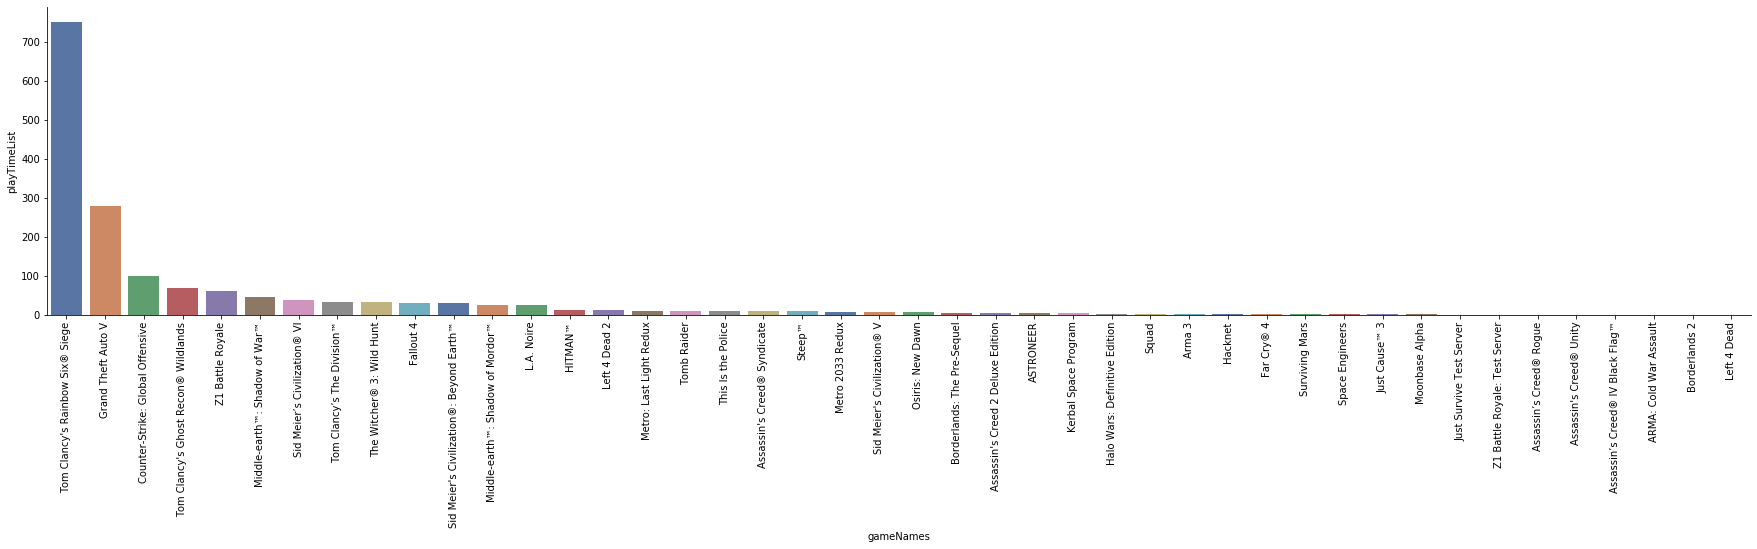

In [10]:
sb.catplot(x="gameNames",y="playTimeList",data=plotPlayTimeData,kind="bar",aspect=5,palette="deep").set_xticklabels(rotation=90)
# use seaborn to plot the bar graph, set x lable to game names and y lable to play time list(hours) and data we are using is from
# the data frame we crated called plotPlayTimeData, the kind of the graph is bar graph and the style is "deep" then I used the
# set_xticklabels(rotation=90) to make game names displyed in a verticall way so we can see it clearly.

In [11]:
# In this section I want to graph the challenege 
# All the steps are pretty similar to what I've done for the plotting for the game play time
# so I won't write comment for this section
def garphDataPrep(gameID):
    gameGelobalPercentageInfo = requests.get("http://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid="+str(gameID)+"&format=json").json()
    dataSets = gameGelobalPercentageInfo["achievementpercentages"]["achievements"]
    challangeNamesList = []
    percentagesList = []
    graphDict = {}
    #pprint.pprint(dataSets)
    for gameDataPacks in dataSets:
        challengeId = gameDataPacks["name"]
        achievePerccent = gameDataPacks["percent"]
        percentagesList.append(achievePerccent)
        #print(challengeId)
        #print(achievePerccent)
        aGameDataV2 = requests.get("http://api.steampowered.com/ISteamUserStats/GetSchemaForGame/v2/?key="+key+"&appid="+str(gameID)).json()
        getChallengeList = aGameDataV2["game"]["availableGameStats"]["achievements"]
        #pprint.pprint(getChallengeList)
        for challengeDicts in getChallengeList:
            nameChallengeId = challengeDicts["name"]
            nameOfChalleneg = challengeDicts["displayName"]
            #challangeNamesList.append(nameOfChalleneg)
            if challengeId == nameChallengeId:
                #print(nameOfChalleneg + " " + str(achievePerccent))
                #for gameChallenges in nameOfChalleneg:
                challangeNamesList.append(nameOfChalleneg)
    #print(graphDict)
    #print(len(percentagesList))
    #print(challangeNamesList)
    dictInfoToDataFrame = pd.DataFrame({"challengesNames":challangeNamesList,"ChallengeCP":percentagesList})
    return dictInfoToDataFrame

In [12]:
plotChallenegData=garphDataPrep(812140)
plotChallenegData 

,challengesNames,ChallengeCP
0,This is Sparta!,93.400002
1,An Odyssey in the Making,80.699997
2,Shiny!,77.199997
3,Past Mistakes,76.199997
4,"Harder, Better, Faster, Stronger",75.500000
5,Ramming Speed,73.400002
6,Make It Your Own,72.300003
7,Evil Unearthed,70.599998
8,Aphrodite's Embrace,69.099998
9,Scourge of the Aegean,64.300003


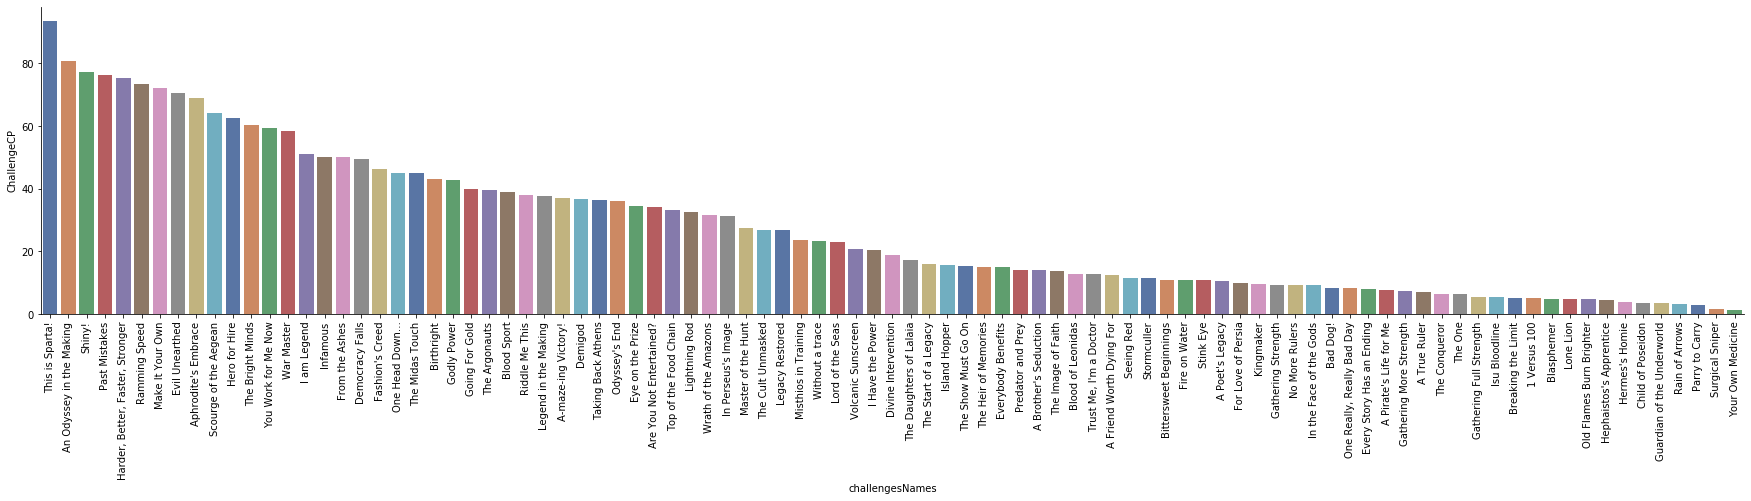

In [13]:
sb.catplot(x="challengesNames",y="ChallengeCP",data=plotChallenegData,kind="bar",aspect=5,palette="deep").set_xticklabels(rotation=90)

In [2]:
# I'm going to read a csv file Produced by Dr.Hax at https://www.kaggle.com/trolukovich/steam-games-complete-dataset#steam_games.csv
# pd.set_option('display.max_colwidth', -1) # this method is I learned from online(I want to see all the hardware requirement) that is why I need it
# this pd.set_option() allows me to set the display option so we set the maxmunm column width to -1 which allows every signle charcaters
# in that column got print out completely.
steamGames = pd.read_csv("steam_games.csv")
steamGames.head(10)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
5,https://store.steampowered.com/bundle/5699/Gra...,bundle,Grand Theft Auto V: Premium Online Edition,Grand Theft Auto V: Premium Online Edition bundle,NaN,NaN,NaN,Rockstar North,Rockstar Games,NaN,"Single-player,Multi-player,Downloadable Conten...","English, French, Italian, German, Spanish - Sp...",NaN,"Action,Adventure",NaN,NaN,NaN,NaN,NaN,$35.18
6,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645

In [15]:
# Some test to get ccomplete version of recent_reviews
getRecentRivews = steamGames[["name","recent_reviews"]].loc[0] # this one game is DOOM
print(getRecentRivews.recent_reviews)
#print(getRecentRivews.recent_reviews)

Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.


In [16]:
def checkGameGeneralInfo(gameName): # this is a function require input a gameName to get information
    gameInfo = steamGames.query("name == @gameName") # assign get game info a variable and we use .query to get a specific game name in pandas csv
    return gameInfo

In [17]:
gameName = input("Search a game: ")
checkGameGeneralInfo(gameName)

Search a game: DOOM


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99


In [18]:
# Get Number of games each publisher has developed include DLCs
steamGames["developer"].value_counts().head(10) # top 10 most published developer in Steam platform

Ubisoft - San Francisco       1041
SmiteWorks USA, LLC            784
KOEI TECMO GAMES CO., LTD.     472
Dovetail Games                 217
Sly                            153
Paradox Development Studio     140
Capcom                         129
N3V Games                      126
CAPCOM Co., Ltd.               120
Choice of Games                118
Name: developer, dtype: int64

In [3]:
# check Ubisoft Montreal studio published games inclueds DLSs
developerGames = steamGames.query("developer == 'Ubisoft Montreal'")["name"]
# ues .query to locate a specified data point in pandas for example under column "developer" we only want to see the name
# Ubisoft Montreal and we want to see the name of the app they developed by specifying ["name"] at the end
developerGames

124                              Assassin's Creed® Origins
416                        Tom Clancy's Rainbow Six® Siege
766                       Assassin’s Creed® IV Black Flag™
995                      Tom Clancy's Rainbow Six® Vegas 2
1051                     Assassin's Creed 2 Deluxe Edition
1154                         Assassin’s Creed® Brotherhood
1306                         Assassin's Creed® Revelations
1389                               Assassin's Creed Bundle
1432              Tom Clancy's Splinter Cell Chaos Theory®
1433     Tom Clancy's Splinter Cell Conviction™ Deluxe ...
1656                                   Myst IV: Revelation
1856                              Far Cry 3 - Blood Dragon
2259                         Far Cry® 2: Fortune's Edition
2350                       Tom Clancy's Rainbow Six® Vegas
2537      Tom Clancy's Splinter Cell Elite Echelon Edition
2744             Assassin's Creed™: Director's Cut Edition
2996           Assassin's Creed Revelations - Gold Editi

In [4]:
# get games primary genre (This cell allows you to see what genres we have)
steamGames[["name","genre"]] # get only two columns game name and genre

,name,genre
0,DOOM,Action
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Action,Adventure,Massively Multiplayer"
2,BATTLETECH,"Action,Adventure,Strategy"
3,DayZ,"Action,Adventure,Massively Multiplayer"
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,..."
5,Grand Theft Auto V: Premium Online Edition,"Action,Adventure"
6,Devil May Cry 5,Action
7,Human: Fall Flat,"Adventure,Indie"
8,They Are Billions,"Strategy,Early Access"
9,Warhammer: Chaosbane,"Action,Adventure,RPG"


In [5]:
steamGames["genre"] = steamGames["genre"].astype("str")
# this part I used .astype("str") to correct all the data in genre to d-type string
# becasue it was keep telling me data in genre column are float for some reason

In [6]:
# this are the numbers of the primary genres for all the games
steamGames["genre"].apply(lambda x:x.split(",")[0]).value_counts()
# we use .apply to apply a lambda function that allows us to apply .split(",") on each element under genre column split by ,
# and we indicate that we want to look for [0] the first word in that data set. Then we use .value_counts() to get 
# numbers of primary genres

Action                   16290
Adventure                 6854
Casual                    6348
Indie                     4364
Simulation                2074
Strategy                  1099
RPG                        927
Free to Play               577
Racing                     474
Design & Illustration      471
nan                        438
Animation & Modeling       231
Utilities                  159
Audio Production           122
Sports                      86
Education                   83
Violent                     44
Massively Multiplayer       39
Web Publishing              35
Video Production            25
Sexual Content              23
Software Training           21
Nudity                      14
Photo Editing                9
Early Access                 6
Accounting                   6
Valve                        4
Movie                        3
Gore                         3
Game Development             2
HTC                          1
Short                        1
Name: ge

In [7]:
# what if I want to see only Ubisfot Games, their gnere and prices?
pd.set_option('display.max_colwidth', -1) # .set_option(...) allows me to expand shortered data like (...)
steamGames.query("publisher == 'Ubisoft'")[["name","genre","original_price","discount_price"]]
# we only look for data in publisher that is Ubisfot
# note the csv returns me bundles these bundles includs multiple games
# so you can see what series games this company has published
# for example Ubisoft have Assassin's Creed series, Far Cry series and more

,name,genre,original_price,discount_price
1068,M&M Heroes Bundle,"Strategy,RPG",NaN,$39.97
1389,Assassin's Creed Bundle,"Action,Adventure",NaN,$98.96
1586,Brothers in Arms Pack,Action,$14.99,$9.99
2290,Bundle: South Park™ : The Stick of Truth™ + The Fractured but Whole™,"Action,Adventure,RPG,Sexual Content,Nudity,Violent,Gore",NaN,$80.98
2537,Tom Clancy's Splinter Cell Elite Echelon Edition,Action,$39.99,$9.99
2640,Dawn of Discovery Gold,"Simulation,Strategy",$14.99,$9.99
2996,Assassin's Creed Revelations - Gold Edition,"Action,Adventure",$29.99,$19.99
3420,Rainbow Six Bundle,Action,NaN,$53.95
3962,Star Trek: Bridge Crew – Bundle Game and The Next Generation,"Casual,RPG,Simulation",NaN,$49.48
4080,Far Cry Bundle,"Action,Adventure",NaN,$121.44


In [8]:
# search a game and see the hardware requirement for the Game (PC only because data are steam data)
pd.set_option('display.max_colwidth', -1) # .set_option(...) allows me to expand shortered data like (...)
def checkAppHDRQ(appName): # a function
    hardwareRequirement = steamGames.query("name == @appName")[["name","minimum_requirements","recommended_requirements"]]
    return hardwareRequirement
    #print(hardwareRequirement.minimum_requirements)
    #print()
    #print(hardwareRequirement.recommended_requirements)

In [9]:
appName = input("Search the game name to check hardware requirement: ")
checkAppHDRQ(appName)

Search the game name to check hardware requirement: DOOM


,name,minimum_requirements,recommended_requirements
0,DOOM,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions),Processor:,Intel Core i5-2400/AMD FX-8320 or better,Memory:,8 GB RAM,Graphics:,NVIDIA GTX 670 2GB/AMD Radeon HD 7870 2GB or better,Storage:,55 GB available space,Additional Notes:,Requires Steam activation and broadband internet connection for Multiplayer and SnapMap","Recommended:,OS:,Windows 7/8.1/10 (64-bit versions),Processor:,Intel Core i7-3770/AMD FX-8350 or better,Memory:,8 GB RAM,Graphics:,NVIDIA GTX 970 4GB/AMD Radeon R9 290 4GB or better,Storage:,55 GB available space,Additional Notes:,Requires Steam activation and broadband internet connection for Multiplayer and SnapMap"


In [10]:
# get a game's reviews and their price information
pd.set_option('display.max_colwidth', -1)
def chekReviewAndPrice(gamesName):
    reviewAndPrice = steamGames.query("name == @gamesName")[["name","popular_tags","recent_reviews","all_reviews","original_price","discount_price"]]
    return reviewAndPrice

In [11]:
gamesName = input("Please input a game name to check review and price information: ") 
chekReviewAndPrice(gamesName)

Please input a game name to check review and price information: DOOM


,name,popular_tags,recent_reviews,all_reviews,original_price,discount_price
0,DOOM,"FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,Multiplayer,Singleplayer,Fast-Paced,Sci-fi,Horror,Classic,Atmospheric,Difficult,Blood,Remake,Zombies,Co-op,Memes","Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.","Very Positive,(42,550),- 92% of the 42,550 user reviews for this game are positive.",$19.99,$14.99


In [12]:
# Let's get an another csv file PS: this CSV file is from Kaggle.com
pd.set_option('display.max_columns', None) # this allows python to display max columns in CSV
gameFeaturesCsv = pd.read_csv("games-features.csv") # read csv file by specifying the file name
gameFeaturesCsv.head() # read defult top 5 data sets

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,AchievementHighlightedCount,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceCurrency,PriceInitial,PriceFinal,SupportEmail,SupportURL,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,ExtUserAcctNotice,HeaderImage,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,0,1,68991,1,13,13033334,92789,9140731,78136,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,9.99,9.99,,http://steamcommunity.com/app/10,Play the worlds number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your teams success. Your teams success affects your role.,http://cdn.akamai.steamstatic.com/steam/apps/10/page_bg_generated_v6b.jpg?t=1447887426,,Play the worlds number 1 online action game. Engage in an incredibly realistic brand of terrorist warfare in this wildly popular team-based game. Ally with teammates to complete strategic missions. Take out enemy sites. Rescue hostages. Your role affects your teams success. Your teams success affects your role.,,,http://cdn.akamai.steamstatic.com/steam/apps/10/header.jpg?t=1447887426,,,English French German Italian Spanish Simplified Chinese Traditional Chinese Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video card Windows XP Mouse Keyboard Internet ConnectionRecommended: 800 mhz processor 128mb ram 32mb+ video card Windows XP Mouse Keyboard Internet Connection,,Minimum: Linux Ubuntu 12.04 Dual-core from Intel or AMD at 2.8 GHz 1GB Memory nVidia GeForce 8600/9600GT ATI/AMD Radeaon HD2600/3600 (Graphic Drivers: nVidia 310 AMD 12.11) OpenGL 2.1 4GB Hard Drive Space OpenAL Compatible Sound Card,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB Hard Drive SpaceNVIDIA GeForce 8 or higher ATI X1600 or higher or Intel HD 3000 or higher Mouse Keyboard Internet Connection,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,0,1,2439,1,5,5399140,60368,753627,22699,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,,,One of the most popular online action games of all time Team Fortress Classic features over nine character classes -- from Medic to Spy to Demolition Man -- enlisted in a unique style of online team warfare. Each character class possesses unique weapons items and abilities as teams compete online in a variety of game play modes.,http://cdn.akamai.steamstatic.com/steam/apps/20/page_bg_generated_v6b.jpg?t=1447350811,,One of the most popular online action games of all time Team Fortress Classic features over nine character classes -- from Medic to Spy to Demolition Man -- enlisted in a unique style of online team warfare. Each character 

In [13]:
# get the most owned game in SteamSpy ## Note this CSV is more than 3 years old the data is not accurate ##
gameFeaturesCsv.sort_values("SteamSpyOwners",ascending=False)[["ResponseName","SteamSpyOwners"]].iloc[0:10]
# check steam spy game owners and the number of owners
# Get top 10 owned games

,ResponseName,SteamSpyOwners
23,Dota 2,90687580
20,Team Fortress 2,37878812
4028,Unturned,27025292
27,Counter-Strike: Global Offensive,25833156
22,Left 4 Dead 2,15574539
11,Counter-Strike: Source,15433570
15,Half-Life 2: Lost Coast,14844765
2115,Warframe,14497544
14,Half-Life 2: Deathmatch,14001822
0,Counter-Strike,13033334
